In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device : {device}")

Using device : cpu


### Using linear regression formula y  = weight * x + bias 

In [6]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.02

x = torch.arange(start,end,step)
y = weight*x + bias

In [11]:
X_train = x[:int(0.8*(len(x)))]
Y_train = y[:int(0.8*(len(x)))]
X_test = x[int(0.8*(len(x))):]
Y_test = y[int(0.8*(len(x))):]
len(X_test),len(Y_train)

(10, 40)

In [13]:
def plot_predictions(
        train_data = X_train,
        train_labels = Y_train,
        test_data = X_test,
        test_labels = Y_test,
        predictions=None):
    
    plt.scatter(train_data,train_labels, c="b", s=5, label="Training Data")
    plt.scatter(test_data,test_labels,c="g",s=5,label="Test Data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=5,label="Predictions")

    plt.legend()

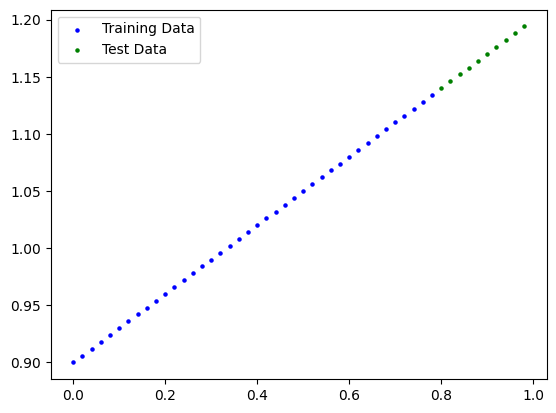

In [14]:
plot_predictions();

In [16]:
# Building a PyTorch linear model by subclassing nn.module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.linear layer to make model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


In [17]:
torch.manual_seed(42)
model1 = LinearRegressionModel()
model1,model1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [19]:
# Training ( Loss function, Optimizer, Training Loop, Testing loop)
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.01)

In [20]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):

    y_preds = model1(X_train)

    loss = loss_fn(y_preds,Y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Testing 
    model1.eval()
    with torch.inference_mode():
        test_pred = model1(X_test)

        test_loss = loss_fn(test_pred,Y_test)

        if epoch % 10 == 0:
            print(f"epoch :{epoch } | loss : {loss} | test loss : {test_loss}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x40 and 1x1)